# Image Searching using Histogram
**Develop an algorithm that can search for an image in another image. For this, it is necessary to calculate a histogram for a fragment of the image. Then move a window in the target image and in each transition separate a piece of the image calculate its histogram. Compare the histogram of the image fragment with the searched fragment. Then select a fragment of the image which is most similar to the histogram of the searched fragment.**


The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In the next lines, we will read the image in grayscale mode using `cv2.imread()` function.
Then it will be showed using `plt.imshow()` and `plt.imshow()` functions.

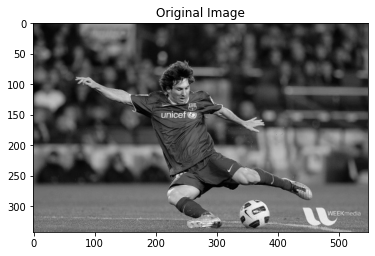

In [6]:
# Reading Airplane.tiff in grayscale mode
original_img = cv2.imread("../../images/messi5.jpg", cv2.IMREAD_GRAYSCALE)

# Passing the image with gray cmap for showing
plt.imshow(original_img, cmap="gray")

# Showing the image
plt.title("Original Image")
plt.show()

The following line could show size of the image

In [7]:
original_img.shape

(342, 548)

In this code snippets we will try to crop the fragment of the image with ball in it. We will use this as our target for searching.

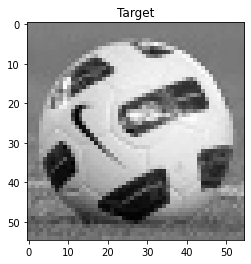

In [9]:
# Specify the coordinates of the target
y_start, x_start = 285, 335
height, width = 55, 55

# Slice image to crop the target
target = original_img[y_start : y_start + height, x_start : x_start + width]

# Showing the image
plt.imshow(target, cmap="gray")
plt.title("Target")
plt.show()

In follwing lines, we find histogram of our target (the ball) using `cv2.calcHist()` function. 

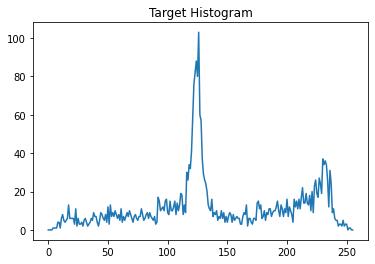

In [19]:
# Calculating target histogram in grayscale mode, no mask, and 256 gray levels and bins
target_histogram = cv2.calcHist([target], [0], None, [256], [0, 256])

# Showing histogram plot
plt.plot(target_histogram)
plt.title("Target Histogram")
plt.show()

We are going to define `find_target` function. It has two arguments, `target` which is the fragment of the picture we want to search for, and `image` which is the image we want to search for the target.

In [14]:
def find_target(target, image):
    """
    target: the fragement of the image in order to search
    image: the image it should search in
    return a np.array() which has the least difference with target
    """
    # Initializing sizes
    img_shape = image.shape
    height, width = target.shape
    # Variable for comparing diffrences
    current_min = float("inf")
    
    # Sliding a window over the image
    for i in range(0, img_shape[0] - height):
        for j in range(0, img_shape[1] - width):
            # Choosing a fragment of the image
            fragment = image[i : i + height, j : j + width]
            # Calculating histogram of the fragment
            fragment_hist = cv2.calcHist([fragment], [0], None, [256], [0, 256])
            # Calculating difference between target and chosen fragment
            diff = cv2.compareHist(target_histogram, fragment_hist, cv2.HISTCMP_CHISQR)
            # Checking for need to update the result
            if diff < current_min:
                result = fragment
                current_min = diff
    return result

The following code snippet cosists of loading two test case. First one is the flipped mode of `original_img` and the second one is totally new.

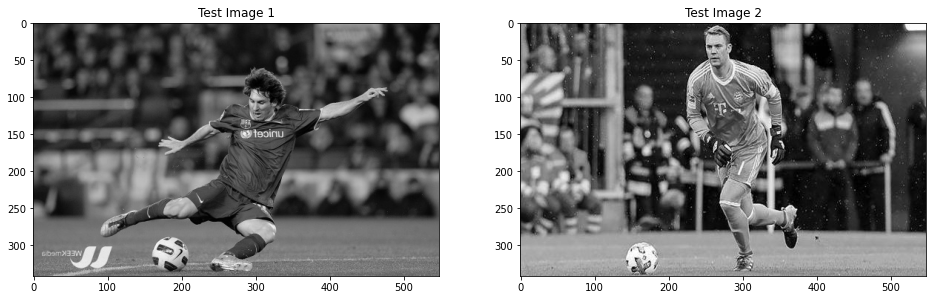

In [15]:
# Generating two images for test function
test_img_1 = cv2.flip(original_img, 1)
test_img_2 = cv2.imread("../../images/neuer.jpeg", cv2.IMREAD_GRAYSCALE)


# Showing the test images
f, subplt = plt.subplots(1, 2, figsize=(16, 14))
subplt[0].imshow(test_img_1, cmap="gray")
subplt[0].set_title("Test Image 1")

subplt[1].imshow(test_img_2, cmap="gray")
subplt[1].set_title("Test Image 2")

plt.show()

At last, we call `find_target` function for two test images. The target is the ball, And images was two images above. We can see result of function and their histograms.

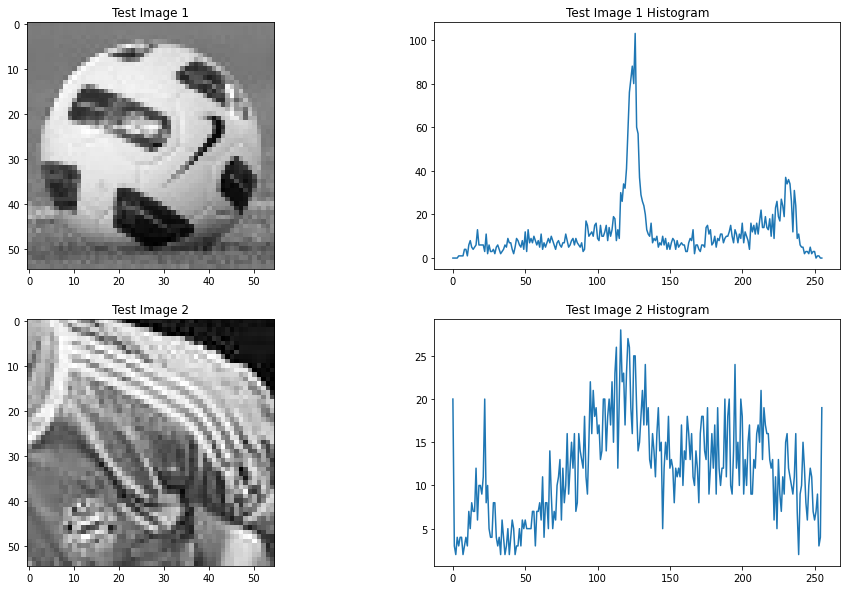

In [18]:
# Calling function for searching the target in test pictures
result_1 = find_target(target, test_img_1)
result_2 = find_target(target, test_img_2)

# Showing test images and their histograms
f, subplt = plt.subplots(2, 2, figsize=(16, 10))
subplt[0, 0].imshow(result_1, cmap="gray")
subplt[0, 0].set_title("Test Image 1")

subplt[0, 1].plot(cv2.calcHist([result_1], [0], None, [256], [0, 256]))
subplt[0, 1].set_title("Test Image 1 Histogram")

subplt[1, 0].imshow(result_2, cmap="gray")
subplt[1, 0].set_title("Test Image 2")

subplt[1, 1].plot(cv2.calcHist([result_2], [0], None, [256], [0, 256]))
subplt[1, 1].set_title("Test Image 2 Histogram")

plt.show()

In the first image (flipped version of original image) it found the ball which was not strange because flipping does not affect histogram of the image including our target.
But in the second image, our function was not be able to find ball because it has a different histogram.
We can conclude searching a image with a histogram is useful in the cases that target is actually a part of the image or roughly the same picture, and it is not able to find target in new pictures.